# Preporuka knjiga pomoću sadržajno baziranog filtriranja

## Goodbooks skup podataka

Skup podataka koji će se koristiti za izradu sustava preporuke je Goodbooks. Verzija s kojom se radi je [goodbooks-10k](http://fastml.com/goodbooks-10k-a-new-dataset-for-book-recommendations/) i objavljena je 29.11.2017. na stranici [FastML ](http://fastml.com/) i sadrži 6000000 ocjena za 10000 najpopularnijih knjiga (s najviše ocjena) koju je napravilo 53424 korisnika. Svi korisnici su napravili najmanje dvije ocjene. Srednji broj ocjena po korisniku je 8. Općenito, imamo oko 100 recenzija za svaku knjigu. Fast ML je stranica koja je zamišljena da se bavi zanimljivim temama u strojnom učenju, a da to istovremeno bude zabavno i lako za čitanje i razumijevanje. 

Stranica s koje su podaci prikupljeni je kako se navodi slična stranici Goodreads koja je inače najveća stranica na svijetu za čitatelje i preporuku knjiga. Stranica je krenula s radom 2007. Na navedenoj stranici možete vidjeti koje su knjige vaši prijatelji čitali, pratiti knjige koje čitate, koje ste pročitali i želite pročitati te možete pogledati svoje prilagođene preporuke knjiga.

Izvorni podaci se nalaze u csv. datotekama u  **books.csv, ratings.csv, book_tags, tags, to_read**.

## Najava korištenja potrebnih biblioteka

Uključivanje i opis potrebnih  Python biblioteka koje će se koristiti u notebooku.

In [2]:
# Numpy
# Služi za znanstveno računanje
import numpy as np
# Pandas služi na primjer za import i export podataka u različitim formatima
# (csv, txt, Excel, itd,...)
import pandas as pd 
# Os
# Glavna svrha os modula je interakcija s operativnim sustavom, odnosno os  
# omogućuje funkcije za interakciju s operativnim sustavom
import os 
# Pomoću ove naredbe se graf prikazuje ispod koda unutar notebooka
%matplotlib inline 
# Matplotlib 
# Matplotlib je biblioteka u Pythonu za vizualizaciju podataka, pyplot je 
# modul unutar matplot biblioteke, a plt alias za pyplot
import matplotlib.pyplot as plt
# Warnings
# Ovom naredbom se omogućuje da bilo koje greške na koje program bude nailazio
# ne ispisuju
import warnings 
warnings.filterwarnings("ignore")

## Učitavanje podataka
Ovdje ćemo učitati csv. datoteke iz Goodbooks skupa podataka te pogledati sadržaj svake od datoteka kako bi pružili bolji uvid u podatke.

In [3]:
# Utvrđivanje lokacije podataka
GOODBOOKS ='goodbooks_skup_podataka'
KNJIGE = 'books.csv'
OCJENE ='ratings.csv'
OZNAKE_KNJIGA ='book_tags.csv'
OZNAKE ='tags.csv'
KNJIGE_ZA_CITANJE ='to_read.csv'
# Čitanje datoteka 
books = pd.read_csv(os.path.join(GOODBOOKS, KNJIGE), 
                     encoding='utf-8')
ratings = pd.read_csv(os.path.join(GOODBOOKS, OCJENE), 
                     encoding='utf-8')
book_tags = pd.read_csv(os.path.join(GOODBOOKS,OZNAKE_KNJIGA),
                    encoding='utf-8')
tags = pd.read_csv(os.path.join(GOODBOOKS,OZNAKE),
                    encoding='utf-8')
to_read = pd.read_csv(os.path.join(GOODBOOKS,KNJIGE_ZA_CITANJE),
                    encoding='utf-8')

## Priprema i istraživanje podataka

###  Knjige

In [4]:
# Provjera prvih 5 redova
books.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


Knjige su razvrstane prema njihovoj popularnosti, po broju ocjena silaznim slijedom.

In [5]:
# Provjera kolona 
books.columns

Index(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url'],
      dtype='object')

In [6]:
# Provjera informacija
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
book_id                      10000 non-null int64
goodreads_book_id            10000 non-null int64
best_book_id                 10000 non-null int64
work_id                      10000 non-null int64
books_count                  10000 non-null int64
isbn                         9300 non-null object
isbn13                       9415 non-null float64
authors                      10000 non-null object
original_publication_year    9979 non-null float64
original_title               9415 non-null object
title                        10000 non-null object
language_code                8916 non-null object
average_rating               10000 non-null float64
ratings_count                10000 non-null int64
work_ratings_count           10000 non-null int64
work_text_reviews_count      10000 non-null int64
ratings_1                    10000 non-null int64
ratings_2                    10000 n

Iz ovoga prikaza vidimo da imamo 10000 knjiga. Vidi se da podatci nisu baš očišćeni na adekvatan način, odnosno vidi se da neke vrijednosti nedostaju kod pojedinih atributa, a neke nisu potrebne za preporuku pa će se podatci očistiti  tako što će se ukloniti oni koji su nepotrebni i popuniti će se pojedine vrijednosti atributa koje nedostaju.

In [7]:
# Izbacuju se kolone koje su suvišne
books = books.drop('isbn', 1) #1 je broj osi (0 za redove, a 1 za kolone)
books = books.drop('isbn13', 1) 
books = books.drop('image_url', 1)
books = books.drop('small_image_url', 1) 

# Popuniće se godine objavljivanja koje nedostaju s 1974. godinom 
books.original_publication_year = books.original_publication_year.fillna(1974) 

# Zamijeniće se originalni naslovi koji nedostaju s običnim naslovima 
books.original_title.fillna(books.title, inplace=True) 

# Zamijeniće se nedostajući jezici sa 'Unknown'
books.language_code = books.language_code.fillna('Unknown')

In [8]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
book_id                      10000 non-null int64
goodreads_book_id            10000 non-null int64
best_book_id                 10000 non-null int64
work_id                      10000 non-null int64
books_count                  10000 non-null int64
authors                      10000 non-null object
original_publication_year    10000 non-null float64
original_title               10000 non-null object
title                        10000 non-null object
language_code                10000 non-null object
average_rating               10000 non-null float64
ratings_count                10000 non-null int64
work_ratings_count           10000 non-null int64
work_text_reviews_count      10000 non-null int64
ratings_1                    10000 non-null int64
ratings_2                    10000 non-null int64
ratings_3                    10000 non-null int64
ratings_4                    10000

Sve je uredu. Informacije su poredane kako se očekivalo. Budući da je atribut autori presudan za izradu preporuke pokušat će se vidjeti koji su autori točno najpopularniji. Važno je za pretpostaviti da će knjige od istog autora biti uglavnom iste tematike. (neki autori većinom pišu samo Sci-Fi kao što je J. K. Rowling, serija Sci-Fi romana o Harry Potteru). 

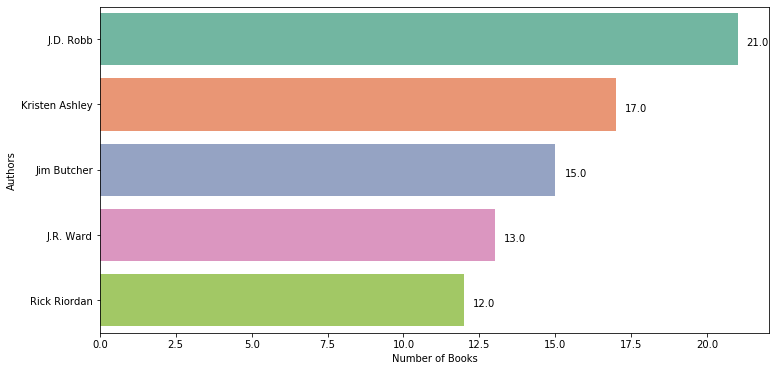

In [9]:
# Seaborn je biblioteka za izradu statističke grafike u Pythonu. 
import seaborn as sns

# Gleda prosječne ocjene veće od 4.3 
high_rated_author = books[books['average_rating']>=4.3]

# Grupira  prvih 5 autora po broju naslova  u opadajućem slijedu 
high_rated_author = high_rated_author.groupby('authors')['title'].count().reset_index().sort_values('title', ascending = False).head(5).set_index('authors')

# Definicija veličine grafa 
plt.figure(figsize=(12,6))

# Prikaz autora po naslovima označeni različitim bojama
ax = sns.barplot(high_rated_author['title'], high_rated_author.index, palette='Set2')

# Tekst na x- osi
ax.set_xlabel("Number of Books") 

# Tekst na y-osi
ax.set_ylabel("Authors")

# ax.text - dodaje text na graf
# i.get.width() -širina dodanog texta na grafu
# i.get_y - pomjeranje prema dolje dodanog teksta na gradu

for i in ax.patches:
    ax.text(i.get_width()+0.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k')


Prvih 5 najpopularnijih autora s prosječnom ocjenom većom od 4.3 poredani po broju naslova u opadajućem redoslijedu: J.D.Robb, Kristen Ashley, Jim Butcher, J.R.Ward i Rick Riordan.  
Napomena - Primjer koji se naveo je primjer jedne od najpopularnijih knjiga na svijetu, tj. svima poznatoj seriji knjiga da mogla lakše procijeniti vjerodostojnost sustava, međutim J.K. Rowling u ovom skupu podataka nema više visoko ocijenjenih knjiga  od gore navedenih autora pa nije na vrhu liste.

### Ocjene

Datoteka sadrži korisnički id, id knjige i  ocjene sortirane vremenski (prvo najstarije). Ocjene su od 1 - 5. 

In [10]:
# Provjera prvih 5 redova
ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [11]:
# Pregled minimalne i maksimalne ocjene 
ratings.rating.min(), ratings.rating.max()

(1, 5)

Text(0.5, 1.0, 'Distribucija ocjena')

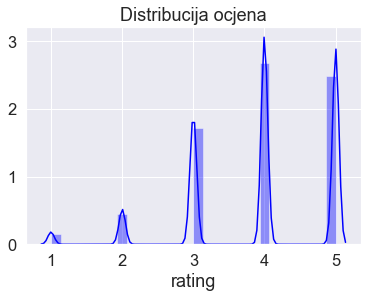

In [12]:
# set_style - funkcija koja utječe na stvari kao što je boja osi,i drugi 
# estetski elementi
sns.set_style('white')
sns.set(font_scale=1.5)

# Pregled distribucije ocjena
sns.distplot(ratings['rating'],color ='blue',bins=30).set_title('Distribucija ocjena')

Ocjena 4 je prilično visoka ocjena, što znači da mnogi čitatelji imaju tendenciju da koncentriraju svoje ocjene na kraju ljestvice. Ovaj histogram to dokazuje ilustrirajući da je većina ocjena 3 ili veća i to bi moglo biti zato što čitatelji najčešće već znaju ono što im se sviđa i prema tome biraju knjige u kojima uživaju, zato što ne žele davati "negativne ocjene" ili su barem u jednom dijelu knjige uživali na neki način i prema tome im daju pretežno visoke ocjene.

In [13]:
# Provjera informacija 
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5976479 entries, 0 to 5976478
Data columns (total 3 columns):
user_id    int64
book_id    int64
rating     int64
dtypes: int64(3)
memory usage: 136.8 MB


Iz informacija o ocjenama zaključujemo se da ima oko 6000000 ocjena.

In [17]:
# Provjera broja korisnika
ratings.user_id.max()

53424

Iz ovoga vidimo da imamo 53424 korisnika.

### Oznake knjiga

Oznake u ovoj datoteci su predstavljene njihovim id - iovima. Sortirane su  uzlaznim redoslijedom s goodreads-id i count-om u silaznom redoslijedu. 

In [15]:
# Provjera prvih  5 redaka
book_tags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [16]:
# Provjera informacija
book_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999912 entries, 0 to 999911
Data columns (total 3 columns):
goodreads_book_id    999912 non-null int64
tag_id               999912 non-null int64
count                999912 non-null int64
dtypes: int64(3)
memory usage: 22.9 MB


### Oznake

U ovoj datoteci se id prevode u imena. 

In [17]:
#Provjera posljednjih 5 redova
tags.tail()

,tag_id,tag_name
34247,34247,Ｃhildrens
34248,34248,Ｆａｖｏｒｉｔｅｓ
34249,34249,Ｍａｎｇａ
34250,34250,ＳＥＲＩＥＳ
34251,34251,ｆａｖｏｕｒｉｔｅｓ


In [18]:
# Provjera informacija
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34252 entries, 0 to 34251
Data columns (total 2 columns):
tag_id      34252 non-null int64
tag_name    34252 non-null object
dtypes: int64(1), object(1)
memory usage: 535.3+ KB


Imamo oko 34252 oznake / imena oznaka.

### Knjige  za čitanje

Knjige koje su korisnici označili za čitanje . Ima blizu milijun parova.

In [19]:
# Provjera prvih 5 redova
to_read.head()

,user_id,book_id
0,9,8
1,15,398
2,15,275
3,37,7173
4,34,380


In [20]:
# Provjera informacija
to_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912705 entries, 0 to 912704
Data columns (total 2 columns):
user_id    912705 non-null int64
book_id    912705 non-null int64
dtypes: int64(2)
memory usage: 13.9 MB


## Osnovne vrste sustava preporuke

### 1.) Temeljeni na sadržaju

Filtriranje na temelju sadržaja jedna je od uobičajenih metoda za izgradnju
sustava preporuke. Oni "preporučuju" personalizirani sadržaj na temelju 
korisničkih prošlih / trenutnih sklonosti za poboljšanje korisničkog iskustva. 

U sustavima preporuka na temelju sadržaja uzimaju se u obzir ključne riječi ili svojstva predmeta dok preporučuju predmet korisniku. Ukratko, to je poput preporučivanja sličnih stavki. Zamislite da čitate knjigu o vizualizaciji podataka i želite potražiti druge knjige na istu temu. U ovom bi slučaju sustav preporuka koji se temelji na sadržaju bio prikladan. 

### 2.) Sustavi temeljeni na suradnji / kolaborativno filtriranje

Kolaborativno filtiranje je tehnika koja može filtrirati stavke koje bi se korisniku mogle svidjeti na temelju reakcija sličnih korisnika.Radi tako što pretražuje velike skupine korisnika i pronalazi manji set korisnika s  sličnim ukusima određenom korisniku. Pregledava stavke koje im se sviđaju i kombinira ih kako bi stvorio rangirani popis prijedloga.
Mnogo je načina da se odluči koji su korisnici slični i da se kombiniraju njihovi izbori kako bi se stvorio popis preporuka. 
Dijeli se na kolaborativno filtriranje na temelju memorije i kolaborativno
filtriranje na temelju modela.

Za gradnju sustava preporuke izabrao se graditi sustav na temelju sadržaja.

## Sustav preporuke na temelju sadržaja

### Teoretski dio

Razmotrit će se bitni koncepti koji se koriste u gradnji sustava preporuke temeljen na sadržaju kao što su

- TF-IDF (engl. term frequency-inverse document frequency)
- Vecor Space Model
- Cousine Similarity

**TF-IDF** algoritam se upotrebljava za "vaganje" ključne riječi u bilo kojem dokumentu i  da se dodijeli važnost toj ključnoj riječi na temelju broja pojavljivanja u dokumentu. Jednostavno rečeno, što je veći TF-IDF rezultat (težina), to je rjeđi i važniji izraz, i obrnuto. TF-IDF pomaže u procjeni važnosti riječi u dokumentu.

**TF – Term Frequency**
TF (pojam učestalost) riječi je broj učestalosti u dokumentu. Kad to znate, možete vidjeti upotrebljavate li termin prečesto ili rijetko.

TF (t) = (Broj pojavljivanja izraza t u dokumentu) / (Ukupan broj pojmova u dokumentu).

**IDF (obrnuta učestalost dokumenta)** riječi mjerilo je koliko je značajan taj pojam u cijelom dokumentu. 

IDF (t) = log_e (Ukupan broj dokumenata / Broj dokumenata sa izrazom t u njemu). 

Primjer korištenja TD-IDF vektora možemo na primjeru je pretrage rezultata na Googleu za NBA košarkaške utakmice. Tu će riječi kao je/i češće  biti prisutne nego na primjer košarka/košarkaških, ali vjerodostojnija je važnost riječi košarka gledajući razlog / upit pretraživanja. U tim slučajevima će TF-IDF zanemariti riječi sa velikom učestalošću ponavljanja.

<br>Formula za izračun TF-IDF:<br>
![tf-idf](images/tf-idf.jpg)

Sada kad se ima reprezentacija svake stavke u smislu njezina opisa onda se može izračunati relevantnost ili sličnost jednog dokumenta drugom. To će se uraditi pomoću Vector Space Model.

**Vector Space Model**
    
U ovom je modelu svaka stavka je  pohranjena kao vektor njenih atributa (koji su ujedno i vektori) u <i>n-dimenzionalnom prostoru</i>, a <i>kutovi</i> između vektora izračunavaju se da bi se odredila <i>sličnost između vektora</i>.
![documents_as_vectors](images/documents_as_vectors.jpg).
<center>Dokumenti predstavljeni kao vektori.<br><br><center>

Metoda izračuna korisnikovih  sviđanja ili ne sviđanja izračunava se uzimajući kosinus kuta između vektora korisničkog profila (Ui) i vektora dokumenta; ili u našem slučaju kut između dva vektora dokumenata.
<i>Glavni razlog korištenja kosinusa je taj što će se vrijednost kosinusa povećavati kako se kut između vektora smanjuje, što znači više sličnosti</i>.
Vektori se normaliziraju po dužini, nakon čega postaju vektori duljine 1.
<br>Da bi izmjerili sličnost između vektora koristi se **Cousine Similarity** mjera sličnosti.<br>

Cousine similarity je mjera sličnosti između dva ne-nulta vektora. Jedna od  zgodnijih stvari vektorske reprezentacije je da se sada može vidjeti koliko su dvije rečenice povezane na osnovu  kutovima njihovih vektora. Vrijednost kosinusa kreće se od -1 do 1.Dakle, ako dva vektora čine kut 0, tada bi vrijednost kosinusa bila 1, što bi zauzvrat značilo da su rečenice usko povezane jedna s drugom. Ako su dva vektora pravokutna, tj. Cos 90°, onda bi to značilo da rečenice gotovo nepovezane.

###  Građenje sustava preporuke


Tekstualni podatci zahtijevaju specijalnu pripremu prije nego što se počnu koristiti za prediktivno modeliranje. Tekst se mora rastaviti da bi uklonili riječi takozvanom tokenizacijom. Nakon toga riječi u tekstu moraju se enkodirati kao integer ili float vrijednosti da bi se koristili kao ulaz za algoritme strojnog učenja, poznato kao vektorizacija.
U Python-u, scikit-learn biblioteka pruža alate za lako izvođenje tokenizacije i vektorizacije tekstualnih podataka koje imate. Skicit learn daje 3 sheme koje se mogu koristiti. Jedan od njih je unaprijed izgrađeni TF-IDF vektorizator koji izračunava TF-IDF rezultat za opis svakog dokumenta, riječ po riječ. Rezultati su normalizirani na vrijednosti između 0 i 1, a kodirani vektori dokumenata tada se mogu izravno koristiti s većinom algoritama strojnog učenja.

Sustav će se izgraditi na temelju sadržaja koji izračunava sličnost među knjigama na temelju autora knjiga. Preporučit ću knjige koje su slične zadanoj knjizi na temelju imena autora knjige. Koristit ću datoteku **books.csv.**
    
Ovom naredbom pretvaramo izvorne dokumente u matricu značajki TF-IDF. TfidfVectorizer funkcija iz scikit-learn, koja tekst pretvara u značajke vektora koji se mogu koristiti kao parametar pri procjeni i koja rezultat sprema u ovom slučaju varijablu tf.Fit_transform koristimo da bi se naš procjenitelj prilagodio podacima,i da transformiramo našu matricu brojanja u tf-idf 
reprezentaciju.

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),
min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(books['authors'])

Koristit će se Cosine similarity za izračunavanje numeričke vrijednosti koja označava sličnost dviju knjiga. Zbog korištenja TF-IDF vektorizatora izračunavanje Dot proizvoda će neposredno dati kosinusnu sličnost. Za izračun će se koristiti linear_krenel jer je mnogo brži. 

In [23]:
# Ovom naredbom se izračunava linear_kernel između x i y
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [24]:
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Kad se izračuna i dobije matrica parova kosinusnih sličnosti napisat će se funkcija koja vraća 20 najsličnijih knjiga na temelju rezultata kosinusne sličnosti.

In [ ]:
# Kreiranje 1- dimenzionalnog niza sa naslovima knjiga
titles = books['title']
indices = pd.Series(books.index, index=books['title'])
# Funkcija koja daje preporuku na temelju kosinusne sličnosti rezultata 
# autora knjiga
def authors_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    book_indices = [i[0] for i in sim_scores]
    return titles.iloc[book_indices]

Provjera preporuke.

In [59]:
authors_recommendations("Harry Potter and the Sorcerer's Stone (Harry Potter, #1)").head(20)

20      Harry Potter and the Order of the Phoenix (Har...
22      Harry Potter and the Chamber of Secrets (Harry...
23      Harry Potter and the Goblet of Fire (Harry Pot...
24      Harry Potter and the Deathly Hallows (Harry Po...
26      Harry Potter and the Half-Blood Prince (Harry ...
2100    The Harry Potter Collection 1-4 (Harry Potter,...
3274    Harry Potter Boxed Set, Books 1-5 (Harry Potte...
17      Harry Potter and the Prisoner of Azkaban (Harr...
341                                    The Casual Vacancy
398                          The Tales of Beedle the Bard
421              Harry Potter Boxset (Harry Potter, #1-7)
3752         Harry Potter Collection (Harry Potter, #1-6)
4640    Fantastic Beasts and Where to Find Them: The O...
6140    Harry Potter and the Order of the Phoenix (Har...
7522    Hogwarts: An Incomplete and Unreliable Guide (...
9047    Harry Potter Schoolbooks Box Set: Two Classic ...
6427    Short Stories from Hogwarts of Heroism, Hardsh...
7442    Short 

In [82]:
authors_recommendations("Twilight (Twilight, #1)").head(20)

48                                New Moon (Twilight, #2)
51                                 Eclipse (Twilight, #3)
55                           Breaking Dawn (Twilight, #4)
72                                The Host (The Host, #1)
731     The Short Second Life of Bree Tanner: An Eclip...
833                         Midnight Sun (Twilight, #1.5)
1618    The Twilight Saga Complete Collection  (Twilig...
2020             The Twilight Collection (Twilight, #1-3)
4087    The Twilight Saga: The Official Illustrated Gu...
5295                                          The Chemist
3074    Twilight: The Graphic Novel, Vol. 1 (Twilight:...
5244    Twilight: The Graphic Novel, Vol. 2  (Twilight...
6581                        Bloody Jack (Bloody Jack, #1)
991                    The Twilight Saga (Twilight, #1-4)
5185                 Off to Be the Wizard (Magic 2.0, #1)
9028                  Spell or High Water (Magic 2.0, #2)
251                     Cinder (The Lunar Chronicles, #1)
580           

In [43]:
authors_recommendations('Romeo and Juliet').head(20)

838                              The Merchant of Venice
153                                             Macbeth
352                                             Othello
713                                           King Lear
772                             The Taming of the Shrew
803                                         The Tempest
854                                       Twelfth Night
1884                                     As You Like It
2208                                 The Complete Works
6416                                  The Winter's Tale
6529                                   Titus Andronicus
6691                               The Comedy of Errors
8895                                         Richard II
8028             City of Stairs (The Divine Cities, #1)
529                              Much Ado About Nothing
3699                                        Richard III
769                                       Julius Caesar
554     Hamlet: Screenplay, Introduction And Fil

Kao što se vidi preporuke su prilično vjerodostojne za filmove **Harry Potter and the Sorcerer's Stone (Harry Potter, #1), Twilight (Twilight, #1) i Romeo and Juliet**. To se vidi za prvi film gdje sustav preporučuje veoma slične objekte prethodnima, serija knjiga o Harry Potteru što može biti zanimljivo korisnicima, ali isto tako ako može nam preporučiti i dosta drugačije objekte drugog žanra na primjer kao što je u ovom slučaju The Casual Vacancy to jest  sustav je preporučio žanr dramu, a ne Sci-Fi.

Prednosti sadržajno bazirane preporuke:

- Za razliku od kolaborativnog filtriranja  koje treba ocjenu drugih korisnika da bi pronašli sličnost među korisnicima i zatim dali prijedlog sadržajno bazirana preporuka mora analizirati samo objekte i profil korisnika radi preporuke.
- Nema hladnog početka, novi objekti se mogu predložiti prije nego što ih ocijeni značajan broj korisnika.
- Rezultati su vrlo relevantni. Budući da se preporuke na temelju sadržaja oslanjaju na karakteristike samih objekata, vjerojatno će biti vrlo relevantne za interese korisnika.
- Ponekad može  preporučiti nove i specifične objekte.

Nedostatci ovog pristupa su:

- Filtriranje na temelju sadržaja ima problem prekomjerne specijalizacije, gdje bi korisnik mogao dobiti previše istih vrsta objekata (npr. Preporučiti sve filmove "Gospodara prstenova") i ne preporučiti drugačije stavke, ali ipak mogu biti zanimljive korisniku.
- Ne uzima u obzir što drugi misle o objektu, tako da se mogu javiti preporuke za neku nisku kvalitetu predmeta.

## Zaključak 
Cilj ovog projekta je bio da se izgradi sadržajno baziran sustav preporuke knjiga koristeći Goodbooks skup podataka s oko 6 milijuna ocjena koje je napravilo oko 50 tisuća korisnika za 10 tisuća knjiga. Prvo se započelo s učitavanjem i istraživanjem podataka kako bi se otkrilo kakav utjecaj imaju na korisnikove ocjene. Nakon toga se razvo sustav preporuke temeljen na autorima knjiga. Vjerodostojnost preporuke se provjerila na primjeru tri filma.